In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        125742 non-null  float64
 4   Life_Style_Index             111469 non-null  float64
 5   Confidence_Life_Style_Index  111469 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         60632 non-null   float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

In [10]:
for i in df.columns[1:] :
    print(df[i].value_counts())
    print('\n')

30.18     65
30.74     63
29.54     61
29.58     60
31.66     60
          ..
103.44     1
100.51     1
98.62      1
79.24      1
88.37      1
Name: Trip_Distance, Length: 10326, dtype: int64


B    31136
C    28122
A    21569
D    18991
E    11634
Name: Type_of_Cab, dtype: int64


10.0    42680
2.0     11621
3.0     10351
0.0     10169
5.0      8641
1.0      8297
4.0      7726
7.0      7407
6.0      7375
8.0      6328
9.0      5147
Name: Customer_Since_Months, dtype: int64


2.70697    14
2.77608    14
2.78465    13
2.69489    12
2.77447    12
           ..
2.64184     1
2.97707     1
2.90484     1
3.19257     1
2.10775     1
Name: Life_Style_Index, Length: 55978, dtype: int64


B    40355
C    35967
A    35147
Name: Confidence_Life_Style_Index, dtype: int64


A    77597
B    29555
C     7484
D     6588
E     2717
F     1950
G     1489
H     1260
I      813
J      695
K      680
L      643
N       98
M       93
Name: Destination_Type, dtype: int64


2.75000    122
3.50000    120
3.350

In [11]:
non_cat_var = ['Trip_Distance','Life_Style_Index','Customer_Rating'] #Can round off customer rating and change it to categorical 

Var1, Var2, Var3 are very weird. Will try to find out a pattern. I am assuming it has something to do with age

In [26]:
df[df['Var3']>df['Var1']]

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type,Age
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2,14
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2,22
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2,53
5,T0005689469,19.06,E,10.0,NaN,NaN,A,2.59750,1,72.0,63,91,Male,3,28
12,T0005689479,39.73,B,10.0,2.84870,C,B,3.12875,2,71.0,47,76,Male,2,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131649,T0005908493,15.05,NaN,9.0,2.73235,A,A,2.92500,1,36.0,48,77,Female,2,29
131655,T0005908507,20.18,NaN,10.0,2.69374,C,F,4.52625,1,48.0,47,62,Female,3,15
131656,T0005908508,22.90,D,10.0,2.51438,A,A,1.47250,2,33.0,52,78,Female,3,26
131657,T0005908509,11.72,D,1.0,2.74229,A,A,3.28500,0,61.0,47,76,Male,3,29


In [14]:
df['Age'] = df['Var3'] - df['Var2']

In [15]:
df['Age']

0         14
1         22
2         21
3         22
4         53
          ..
131657    29
131658    25
131659    27
131660    25
131661    28
Name: Age, Length: 131662, dtype: int64

In [17]:
df['Age'].argmax()

41942

In [18]:
df.iloc[41942,:]

Trip_ID                        T0005759192
Trip_Distance                        35.69
Type_of_Cab                              D
Customer_Since_Months                   10
Life_Style_Index                   2.61679
Confidence_Life_Style_Index              B
Destination_Type                         A
Customer_Rating                    2.32125
Cancellation_Last_1Month                 0
Var1                                   103
Var2                                    48
Var3                                   206
Gender                              Female
Surge_Pricing_Type                       3
Age                                    158
Name: 41942, dtype: object

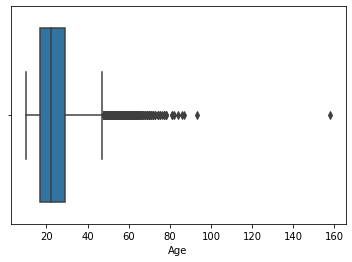

In [27]:
sns.boxplot(df['Age'])

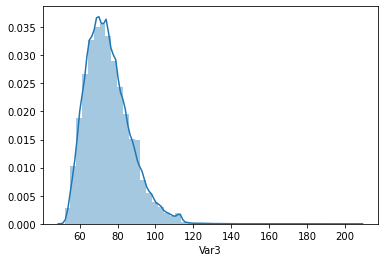

In [22]:
sns.distplot(df['Var3'])

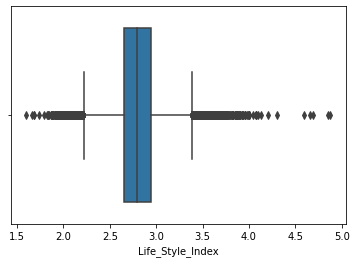

In [30]:
sns.boxplot(df['Life_Style_Index'])